In [14]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
from tensorflow.keras.models import load_model

In [15]:
model_path = './LSTM_model.h5'
model = load_model(model_path)
prediction_path = './prediction.csv'
prediction = pd.read_csv(prediction_path)
error = prediction.iloc[-1, 0] - prediction.iloc[-1, 1]

In [16]:
def predict_and_plot_btc_prices(num_days_to_predict):
  today = datetime.date.today()
  BTC_quant = yf.download('BTC-USD', start=today-datetime.timedelta(days=365), end=today)
  new_df=BTC_quant.filter(['Adj Close'])
  last_30_days = new_df[-30:].values
  scaler = MinMaxScaler()
  close_price = BTC_quant['Adj Close']
  scaled_data = scaler.fit_transform(close_price.values.reshape(-1,1))
  last_30_days_scaled = scaler.transform(last_30_days)
  predictions = []
  predicted_dates = []
  for _ in range(num_days_to_predict):
    offset = error*(0.5-0.03*_)
    if (offset<0):
      offset = 0
    last_date = new_df.index[-1]
    # Create an empty list for the current iteration
    X_test = []
    # Append the past 60 days of scaled data
    X_test.append(last_30_days_scaled)
    # Convert the X_test data into a numpy array
    X_test = np.array(X_test)
    # Reshape the data
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    # Get the predicted scaled price
    pred_price = model.predict(X_test)
    # Undo the scaling
    pred_price_unscaled = scaler.inverse_transform(pred_price)
    # Add the unscaled predicted price to the list of predictions
    predictions.append(pred_price_unscaled[0][0]+offset)
    # Update last_30_days_scaled by removing the first day and adding the predicted price
    last_30_days_scaled = np.concatenate((last_30_days_scaled[1:], pred_price), axis=0)
    # Add the predicted date to the list of predicted_dates
    predicted_date = last_date + datetime.timedelta(days=_+1)
    predicted_dates.append(predicted_date)
  print(f"Price of BTC-USD for the next {num_days_to_predict} trading days: {predictions}")
  fig, ax = plt.subplots()
  ax.plot(predicted_dates, predictions, marker='o', label='Predicted Prices')
  ax.set(xlabel='Date', ylabel='BTC-USD Price', title=f'Predicted BTC-USD Prices for the Next {num_days_to_predict} Trading Days')
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
  ax.set_xlim(predicted_dates[0] - datetime.timedelta(days=2), predicted_dates[0] + datetime.timedelta(days=5))
  plt.xticks(rotation=45)
  plt.legend()
  plt.grid()
  plt.savefig(f'./Prediction_{num_days_to_predict}days', dpi=300, bbox_inches='tight')
  plt.show()

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 28ms/step
Price of BTC-USD for the next 5 trading days: [28981.4180234375, 29226.81184828125, 29259.822860625, 29170.67176359375, 29024.2667603125]


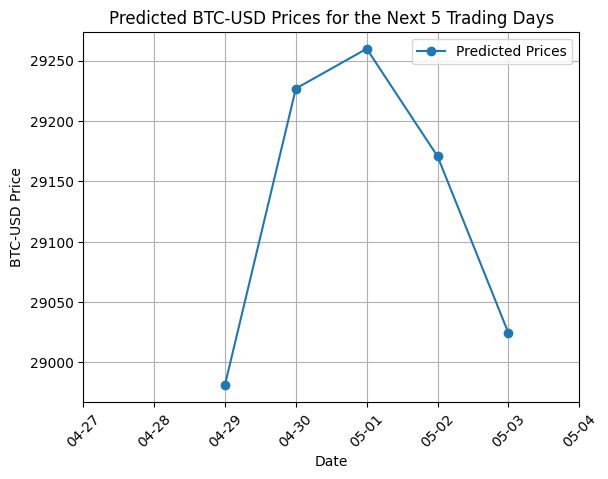

In [17]:
predict_and_plot_btc_prices(5)

In [18]:
### The code below is for dataset that merge sentimental data ONLY
### The code will be commented until the sentimental data is fetched
"""
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler

def predict_and_plot_btc_prices_with_sentiment_from_csv(num_days_to_predict, sentiment_data_file):
    sentiment_data_df = pd.read_csv(sentiment_data_file)
    sentiment_data = sentiment_data_df['sentiment'].tolist()
    assert len(sentiment_data) == 30, "Sentiment data length must be 30 for the past 30 days."
    
    today = datetime.date.today()
    BTC_quant = yf.download('BTC-USD', start=today-datetime.timedelta(days=365), end=today)
    new_df = BTC_quant.filter(['Adj Close'])
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(new_df)
    last_30_days = new_df[-30:].values
    last_30_days_scaled = scaler.transform(last_30_days)
    predictions = []
    predicted_dates = []
    last_30_days_scaled_with_sentiment = last_30_days_scaled + (last_30_days_scaled * np.array(sentiment_data).reshape(-1, 1))
    
    for i in range(num_days_to_predict):
        last_date = new_df.index[-1]
        X_test = []
        X_test.append(last_30_days_scaled_with_sentiment)
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        pred_price = model.predict(X_test)
        pred_price_unscaled = scaler.inverse_transform(pred_price)
        predictions.append(pred_price_unscaled[0][0])
        last_30_days_scaled_with_sentiment = np.concatenate((last_30_days_scaled_with_sentiment[1:], pred_price), axis=0)
        predicted_date = last_date + datetime.timedelta(days=i+1)
        predicted_dates.append(predicted_date)
    print(f"Price of BTC-USD for the next {num_days_to_predict} trading days: {predictions}")
    fig, ax = plt.subplots()
    ax.plot(predicted_dates, predictions, marker='o', label='Predicted Prices')
    ax.set(xlabel='Date', ylabel='BTC-USD Price', title=f'Predicted BTC-USD Prices for the Next {num_days_to_predict} Trading Days')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax.set_xlim(predicted_dates[0] - datetime.timedelta(days=2), predicted_dates[0] + datetime.timedelta(days=5))
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.savefig(f'./Prediction_{num_days_to_predict}days', dpi=300, bbox_inches='tight')
    plt.show()
"""

'\nimport numpy as np\nimport datetime\nimport yfinance as yf\nimport matplotlib.pyplot as plt\nimport matplotlib.dates as mdates\nfrom sklearn.preprocessing import MinMaxScaler\n\ndef predict_and_plot_btc_prices_with_sentiment_from_csv(num_days_to_predict, sentiment_data_file):\n    sentiment_data_df = pd.read_csv(sentiment_data_file)\n    sentiment_data = sentiment_data_df[\'sentiment\'].tolist()\n    assert len(sentiment_data) == 30, "Sentiment data length must be 30 for the past 30 days."\n    \n    today = datetime.date.today()\n    BTC_quant = yf.download(\'BTC-USD\', start=today-datetime.timedelta(days=365), end=today)\n    new_df = BTC_quant.filter([\'Adj Close\'])\n    scaler = MinMaxScaler()\n    scaled_data = scaler.fit_transform(new_df)\n    last_30_days = new_df[-30:].values\n    last_30_days_scaled = scaler.transform(last_30_days)\n    predictions = []\n    predicted_dates = []\n    last_30_days_scaled_with_sentiment = last_30_days_scaled + (last_30_days_scaled * np.array